# ANÁLISIS REGRESIÓN LOGÍSTICA

### Importación de librerías y apertura de Dataframe

In [1]:
# Importar librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# reset rc params to defaults
sns.reset_orig()

In [2]:
import statsmodels.stats.api as sms # Para la regresión y validación de supuestos ejecutamos el statsmodels
import statsmodels.api as sm # Submódulo de statsmodels que son las estadisticas "stats"
from statsmodels.formula.api import ols # La fórmula api de statsmodel permite seguir la notación antes revisada
from statsmodels.compat import lzip # Módulo para las pruebas de hipótesis.

In [3]:
# Importamos un archivo csv a un DataFrame en pandas
df = pd.read_csv('BDTICMODEL.csv', encoding='ISO-8859-1')
df

,des_tamano,tic1_2,tic1_3a,tic1_3b,tic1_3c,tic1_3d,tic2_1,tic2_2_1a,tic2_2_1b,tic2_2_1c,...,tic5_1d,tic5_1f,tic5_1h,tic6_1,tic6_2a,tic6_2b,tic6_2c,Año,Total_Personal,Total_Espec
0,2,3481,0,3481,0,0,1,2,2,1,...,2,2,2,2,2,2,1,2016,2,0
1,0,1200,600,360,240,0,1,1,2,2,...,2,2,1,2,2,2,1,2016,2,0
2,2,4761,4761,0,0,0,1,2,2,1,...,1,1,1,2,2,2,1,2016,8,0
3,2,31598,31598,0,0,0,1,2,1,2,...,2,1,2,2,2,2,1,2016,1,0
4,1,101277,101277,0,0,0,1,2,2,1,...,2,1,2,2,2,2,1,2016,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14024,0,33388,0,33388,0,0,1,2,2,1,...,1,1,1,2,2,1,2,2021,3,0
14025,0,26819,16359,10459,0,0,1,2,2,1,...,2,1,1,1,2,2,1,2021,21,1
14026,1,10506,10506,0,0,0,1,2,2,1,...,2,1,2,2,2,2,1,2021,60,0
14027,0,2182,196,1985,0,0,1,2,2,1,...,2,1,2,2,2,1,2,2021,22,0


In [4]:
print(df.dtypes)

des_tamano        int64
tic1_2            int64
tic1_3a           int64
tic1_3b           int64
tic1_3c           int64
tic1_3d           int64
tic2_1            int64
tic2_2_1a         int64
tic2_2_1b         int64
tic2_2_1c         int64
tic2_3            int64
tic2_6a           int64
tic2_6b           int64
tic2_6c           int64
tic2_6d           int64
tic2_6f           int64
tic2_6g           int64
tic2_6h           int64
tic2_6i           int64
tic2_6k           int64
tic2_8            int64
tic2_8_2b         int64
tic2_8_2c         int64
tic3_1            int64
tic3_1_2b         int64
tic3_1_2c         int64
tic3_1_2d         int64
tic3_1_2e         int64
tic3_1_2f         int64
tic3_2            int64
tic4_1a           int64
tic4_1b           int64
tic4_1d           int64
tic4_1e           int64
tic4_2a           int64
tic4_2b           int64
tic4_2c           int64
tic4_2d           int64
tic4_2e           int64
tic4_4a           int64
tic4_4b           int64
tic4_4c         

In [5]:
# Trabajos únicamente con las variables categóricas y descartamos las numéricas

# Lista de variables a eliminar
variables_eliminar = ['des_tamano', 'tic1_2', 'tic1_3a', 'tic1_3b', 'tic1_3c', 'tic1_3d', 'tic4_1a', 'tic4_1b', 'tic4_1d', 'tic4_1e', 'Total_Personal', 'Total_Espec', 'Año']

# Eliminar las variables del DataFrame
df = df.drop(variables_eliminar, axis=1)

In [6]:
df.head()

,tic2_1,tic2_2_1a,tic2_2_1b,tic2_2_1c,tic2_3,tic2_6a,tic2_6b,tic2_6c,tic2_6d,tic2_6f,...,tic4_4h,tic5_1a,tic5_1b,tic5_1d,tic5_1f,tic5_1h,tic6_1,tic6_2a,tic6_2b,tic6_2c
0,1,2,2,1,1,1,1,2,2,2,...,2,1,1,2,2,2,2,2,2,1
1,1,1,2,2,2,1,2,1,1,1,...,1,1,1,2,2,1,2,2,2,1
2,1,2,2,1,2,1,2,1,1,2,...,1,1,1,1,1,1,2,2,2,1
3,1,2,1,2,2,1,2,2,1,1,...,1,1,1,2,1,2,2,2,2,1
4,1,2,2,1,2,1,2,1,1,1,...,1,1,1,2,1,2,2,2,2,1


### Análisis de valores perdidos, nulos, etc

In [7]:
df.isnull().sum()

tic2_1       0
tic2_2_1a    0
tic2_2_1b    0
tic2_2_1c    0
tic2_3       0
tic2_6a      0
tic2_6b      0
tic2_6c      0
tic2_6d      0
tic2_6f      0
tic2_6g      0
tic2_6h      0
tic2_6i      0
tic2_6k      0
tic2_8       0
tic2_8_2b    0
tic2_8_2c    0
tic3_1       0
tic3_1_2b    0
tic3_1_2c    0
tic3_1_2d    0
tic3_1_2e    0
tic3_1_2f    0
tic3_2       0
tic4_2a      0
tic4_2b      0
tic4_2c      0
tic4_2d      0
tic4_2e      0
tic4_4a      0
tic4_4b      0
tic4_4c      0
tic4_4d      0
tic4_4e      0
tic4_4f      0
tic4_4g      0
tic4_4h      0
tic5_1a      0
tic5_1b      0
tic5_1d      0
tic5_1f      0
tic5_1h      0
tic6_1       0
tic6_2a      0
tic6_2b      0
tic6_2c      0
dtype: int64

In [8]:
# Eliminamos la variable tic2_1 ya que solo contiene un valor único que es "1"

df = df.drop('tic2_1', axis=1)

### Limpieza de valores perdidos, nulos, etc

### Identificación  del tipo de Datos

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14029 entries, 0 to 14028
Data columns (total 45 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tic2_2_1a  14029 non-null  int64
 1   tic2_2_1b  14029 non-null  int64
 2   tic2_2_1c  14029 non-null  int64
 3   tic2_3     14029 non-null  int64
 4   tic2_6a    14029 non-null  int64
 5   tic2_6b    14029 non-null  int64
 6   tic2_6c    14029 non-null  int64
 7   tic2_6d    14029 non-null  int64
 8   tic2_6f    14029 non-null  int64
 9   tic2_6g    14029 non-null  int64
 10  tic2_6h    14029 non-null  int64
 11  tic2_6i    14029 non-null  int64
 12  tic2_6k    14029 non-null  int64
 13  tic2_8     14029 non-null  int64
 14  tic2_8_2b  14029 non-null  int64
 15  tic2_8_2c  14029 non-null  int64
 16  tic3_1     14029 non-null  int64
 17  tic3_1_2b  14029 non-null  int64
 18  tic3_1_2c  14029 non-null  int64
 19  tic3_1_2d  14029 non-null  int64
 20  tic3_1_2e  14029 non-null  int64
 21  tic3_1_2f  1

### Identificación de valores únicos

In [10]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Valores únicos para la columna '{column}':")
    print(unique_values)
    print()  # Línea en blanco para separar los resultados de cada columna

Valores únicos para la columna 'tic2_2_1a':
[2 1]

Valores únicos para la columna 'tic2_2_1b':
[2 1]

Valores únicos para la columna 'tic2_2_1c':
[1 2]

Valores únicos para la columna 'tic2_3':
[1 2]

Valores únicos para la columna 'tic2_6a':
[1 2]

Valores únicos para la columna 'tic2_6b':
[1 2]

Valores únicos para la columna 'tic2_6c':
[2 1]

Valores únicos para la columna 'tic2_6d':
[2 1]

Valores únicos para la columna 'tic2_6f':
[2 1]

Valores únicos para la columna 'tic2_6g':
[2 1]

Valores únicos para la columna 'tic2_6h':
[2 1]

Valores únicos para la columna 'tic2_6i':
[2 1]

Valores únicos para la columna 'tic2_6k':
[2 1]

Valores únicos para la columna 'tic2_8':
[2 1]

Valores únicos para la columna 'tic2_8_2b':
[1 2]

Valores únicos para la columna 'tic2_8_2c':
[2 1]

Valores únicos para la columna 'tic3_1':
[2 1]

Valores únicos para la columna 'tic3_1_2b':
[2 1]

Valores únicos para la columna 'tic3_1_2c':
[2 1]

Valores únicos para la columna 'tic3_1_2d':
[2 1]

Valores

### Resumen estadístico

In [11]:
df.describe()

,tic2_2_1a,tic2_2_1b,tic2_2_1c,tic2_3,tic2_6a,tic2_6b,tic2_6c,tic2_6d,tic2_6f,tic2_6g,...,tic4_4h,tic5_1a,tic5_1b,tic5_1d,tic5_1f,tic5_1h,tic6_1,tic6_2a,tic6_2b,tic6_2c
count,14029.000000,14029.000000,14029.000000,14029.000000,14029.000000,14029.000000,14029.000000,14029.000000,14029.00000,14029.000000,...,14029.000000,14029.000000,14029.000000,14029.000000,14029.000000,14029.000000,14029.000000,14029.000000,14029.000000,14029.000000
mean,1.870269,1.869698,1.101290,1.398674,1.001426,1.239433,1.230380,1.126524,1.02673,1.129803,...,1.364887,1.042840,1.080761,1.694419,1.310856,1.488559,1.429610,1.760425,1.791218,1.427757
std,0.336020,0.336647,0.301723,0.489643,0.037732,0.426752,0.421091,0.332450,0.16130,0.336098,...,0.481416,0.202503,0.272478,0.460670,0.462861,0.499887,0.495038,0.426839,0.406453,0.494771
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000
50%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000
75%,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error

# Definir X y y
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Ajustar el modelo de regresión logística
logistic_model = LogisticRegression()
logistic_model.fit(X, y)

# Realizar las predicciones
y_pred = logistic_model.predict(X)

# Calcular el MAE
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.13586142989521705


C:\Users\Alejandro Reyes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Tratamiento a la variable Y

In [13]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df.tic3_2.quantile(0.25)
Q3 = df.tic3_2.quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

1.0


In [14]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['tic3_2'] < (Q1 - 1.5 * IQR)) |(df['tic3_2'] > (Q3 + 1.5 * IQR)))]
df.shape

(14029, 45)

C:\Users\Alejandro Reyes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tic3_2', ylabel='Density'>

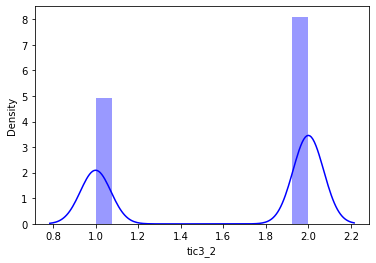

In [15]:
sns.distplot(df['tic3_2'],color="blue")

### Correlación entre variables

In [16]:
df.corr().style.background_gradient(cmap='coolwarm')

,tic2_2_1a,tic2_2_1b,tic2_2_1c,tic2_3,tic2_6a,tic2_6b,tic2_6c,tic2_6d,tic2_6f,tic2_6g,tic2_6h,tic2_6i,tic2_6k,tic2_8,tic2_8_2b,tic2_8_2c,tic3_1,tic3_1_2b,tic3_1_2c,tic3_1_2d,tic3_1_2e,tic3_1_2f,tic3_2,tic4_2a,tic4_2b,tic4_2c,tic4_2d,tic4_2e,tic4_4a,tic4_4b,tic4_4c,tic4_4d,tic4_4e,tic4_4f,tic4_4g,tic4_4h,tic5_1a,tic5_1b,tic5_1d,tic5_1f,tic5_1h,tic6_1,tic6_2a,tic6_2b,tic6_2c
tic2_2_1a,1.000000,0.205975,-0.374519,0.037949,-0.002279,0.004856,-0.030585,-0.006207,-0.028081,-0.006791,0.010269,0.007436,-0.002230,-0.036115,0.021414,0.021083,0.005022,-0.002326,0.008585,0.019406,-0.003683,0.016696,-0.025351,-0.033481,0.014093,0.024261,-0.019631,0.009155,-0.008243,-0.018536,-0.032410,-0.026977,-0.023831,-0.014874,-0.015159,-0.014501,-0.018890,0.010110,0.012361,-0.023945,0.022144,-0.043330,-0.007966,0.001575,-0.002780
tic2_2_1b,0.205975,1.000000,-0.449750,0.060016,0.009013,-0.026952,-0.037145,-0.003640,-0.038251,-0.015575,-0.002890,0.011078,-0.017627,-0.095820,0.048311,0.008851,0.007245,0.018831,0.035728,0.021086,0.005756,0.023330,-0.028370,-0.049368,0.029446,0.061034,-0.046319,-0.032474,-0.027267,-0.031180,-0.049412,-0.052895,-0.057705,-0.035897,-0.019619,-0.018468,-0.018497,0.011371,-0.044405,-0.048839,-0.021143,-0.141018,-0.067441,-0.028994,0.044484
tic2_2_1c,-0.374519,-0.449750,1.000000,0.043178,-0.006423,0.102292,0.127156,0.041368,0.079120,0.072792,0.063932,0.050455,0.106515,0.150236,-0.036292,0.050106,0.043998,0.002348,-0.001989,-0.021802,-0.004148,-0.033519,0.067420,0.077549,-0.011963,-0.015157,0.104596,0.096532,0.063640,0.073135,0.093249,0.088370,0.087937,0.086174,0.072134,0.071404,0.011812,0.007143,0.079100,0.097634,0.053765,0.176360,0.095446,0.064335,-0.068688
tic2_3,0.037949,0.060016,0.043178,1.000000,0.003961,0.182467,0.120485,0.068033,0.041968,0.060650,0.090910,0.109806,0.139180,0.085097,0.006745,0.072736,0.101439,0.008865,0.012029,0.004660,0.020010,0.006753,0.111716,0.019650,0.003063,0.006780,0.067685,0.089212,0.066934,0.109117,0.089359,0.064711,0.072565,0.105281,0.104018,0.101668,0.022572,0.075499,0.090739,0.081271,0.070040,0.065051,0.080135,0.074760,-0.072517
tic2_6a,-0.002279,0.009013,-0.006423,0.003961,1.000000,0.040780,0.019707,0.019717,0.028877,0.007892,0.017521,0.003763,0.010208,0.010568,-0.004257,-0.003020,-0.001506,-0.001642,0.004823,0.005678,0.001541,0.001869,0.009933,-0.007250,0.027093,0.002746,-0.001858,-0.008511,0.000337,0.004206,-0.003054,-0.006011,0.001954,0.000064,0.001065,0.018454,0.001336,0.009602,-0.015947,0.007277,0.004644,-0.009893,-0.000923,0.000816,-0.002120
tic2_6b,0.004856,-0.026952,0.102292,0.182467,0.040780,1.000000,0.292422,0.157274,0.109994,0.150093,0.183354,0.178208,0.285061,0.122242,0.033472,0.121993,0.136389,-0.004293,0.000706,-0.006580,-0.005140,-0.016662,0.150514,0.067562,-0.014050,0.035255,0.111784,0.151504,0.141942,0.159946,0.141680,0.162645,0.153850,0.174418,0.156427,0.182633,0.046277,0.090562,0.125988,0.147184,0.077168,0.127867,0.141564,0.122594,-0.108657
tic2_6c,-0.030585,-0.037145,0.127156,0.120485,0.019707,0.292422,1.000000,0.169098,0.100343,0.153362,0.162072,0.155673,0.260754,0.143722,0.003996,0.118474,0.116471,-0.019767,-0.029735,-0.032725,-0.012879,-0.033131,0.137894,0.063552,-0.007493,0.021776,0.115662,0.125682,0.115464,0.120346,0.113905,0.136555,0.156745,0.144540,0.139541,0.168329,0.030548,0.056525,0.098720,0.149704,0.063659,0.143799,0.146867,0.126110,-0.120613
tic2_6d,-0.006207,-0.003640,0.041368,0.068033,0.019717,0.157274,0.169098,1.000000,0.135001,0.216022,0.148098,0.106129,0.133769,0.112926,0.018135,0.070356,0.081314,0.030088,0.006803,-0.002026,-0.006495,-0.002947,0.115866,0.066646,0.028165,0.005950,0.059670,0.067790,0.127436,0.096464,0.113024,0.126673,0.134063,0.116256,0.106824,0.121296,0.058195,0.065827,0.042081,0.103878,0.087852,0.080324,0.069951,0.058869,-0.055156
tic2_6f,-0.028081,-0.038251,0.079120,0.041968,0.028877,0.109994,0.100343,0.135001,1.000000,0.245004,0.092015,0.066161,0.081097,0.098442,-0.018671,0.044376,0.051826,0.001963,-0.013289,-0.017043,-0.003713,-0.000778

### Recodificación de variables categóricas

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

In [19]:
# Creamos la instancia del objeto
labelencoder = LabelEncoder()

In [20]:
df[var_cualitativas]=df[var_cualitativas].apply(LabelEncoder().fit_transform)

In [21]:
variables = ['tic2_2_1a', 'tic2_2_1b', 'tic2_2_1c', 'tic2_3', 'tic2_6a', 'tic2_6b', 'tic2_6c', 'tic2_6d', 'tic2_6f',
             'tic2_6g', 'tic2_6h', 'tic2_6i', 'tic2_6k', 'tic2_8', 'tic2_8_2b', 'tic2_8_2c', 'tic3_1', 'tic3_1_2b',
             'tic3_1_2c', 'tic3_1_2d', 'tic3_1_2e', 'tic3_1_2f', 'tic3_2', 'tic4_2a', 'tic4_2b', 'tic4_2c', 'tic4_2d',
             'tic4_2e', 'tic4_4a', 'tic4_4b', 'tic4_4c', 'tic4_4d', 'tic4_4e', 'tic4_4f', 'tic4_4g', 'tic4_4h',
             'tic5_1a', 'tic5_1b', 'tic5_1d', 'tic5_1f', 'tic5_1h', 'tic6_1', 'tic6_2a', 'tic6_2b', 'tic6_2c']

# Reemplazar los valores
df[variables] = df[variables].replace({1: 0, 2: 1})

In [22]:
df

,tic2_2_1a,tic2_2_1b,tic2_2_1c,tic2_3,tic2_6a,tic2_6b,tic2_6c,tic2_6d,tic2_6f,tic2_6g,...,tic4_4h,tic5_1a,tic5_1b,tic5_1d,tic5_1f,tic5_1h,tic6_1,tic6_2a,tic6_2b,tic6_2c
0,1,1,0,0,0,0,1,1,1,1,...,1,0,0,1,1,1,1,1,1,0
1,0,1,1,1,0,1,0,0,0,1,...,0,0,0,1,1,0,1,1,1,0
2,1,1,0,1,0,1,0,0,1,1,...,0,0,0,0,0,0,1,1,1,0
3,1,0,1,1,0,1,1,0,0,0,...,0,0,0,1,0,1,1,1,1,0
4,1,1,0,1,0,1,0,0,0,1,...,0,0,0,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14024,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
14025,1,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
14026,1,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,1,1,1,1,0
14027,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,1,0,1


### Modelo de regresión logística

In [23]:
import statsmodels.api as sm

In [27]:
import statsmodels.formula.api as smf

regresion = smf.logit("tic3_2 ~ tic2_2_1a + tic2_2_1b + tic2_2_1c + tic2_3 + tic2_6a + tic2_6b + tic2_6c + tic2_6d + \
                tic2_6f + tic2_6g + tic2_6h + tic2_6i + tic2_6k + tic2_8 + tic2_8_2b + tic2_8_2c + tic3_1_2b + tic3_1_2c + \
                tic3_1_2d + tic3_1_2e + tic3_1_2f + tic3_1 + tic4_2a + tic4_2b + tic4_2c + tic4_2d + tic4_2e + tic4_4a + \
                tic4_4b + tic4_4c + tic4_4d + tic4_4e + tic4_4f + tic4_4g + tic4_4h + tic5_1a + tic5_1b + tic5_1d + \
                tic5_1f + tic5_1h + tic6_1 + tic6_2a + tic6_2b + tic6_2c", data=df)
results = regresion.fit()

Optimization terminated successfully.
         Current function value: 0.533597
         Iterations 6


In [28]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:                 tic3_2   No. Observations:                14029
Model:                          Logit   Df Residuals:                    13984
Method:                           MLE   Df Model:                           44
Date:                Sun, 11 Jun 2023   Pseudo R-squ.:                  0.1949
Time:                        19:41:41   Log-Likelihood:                -7485.8
converged:                       True   LL-Null:                       -9298.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6343      0.148    -11.052      0.000      -1.924      -1.344
tic2_2_1a     -0.1450      0.066     -2.185      0.029      -0.275      -0.015
tic2_2_1b     -0.0749      0.069     -1.091      0.2

Eliminamos los variables con valores superiores a 0.05

In [29]:
import statsmodels.formula.api as smf

regresion_2 = smf.logit("tic3_2 ~ tic2_2_1a + tic2_3 + tic2_6b + tic2_6c + tic2_6d + tic2_6h + \
                      tic2_6k + tic2_8 + tic2_8_2b + tic2_8_2c + tic3_1 + tic4_2c + tic4_2e + \
                      tic4_4b + tic4_4c + tic4_4f + tic4_4h + tic5_1a + tic5_1d + tic6_1 + \
                      tic6_2a + tic6_2b + tic6_2c", data=df)
results_2 = regresion_2.fit()

Optimization terminated successfully.
         Current function value: 0.534525
         Iterations 6


In [30]:
print(results_2.summary())

                           Logit Regression Results                           
Dep. Variable:                 tic3_2   No. Observations:                14029
Model:                          Logit   Df Residuals:                    14005
Method:                           MLE   Df Model:                           23
Date:                Sun, 11 Jun 2023   Pseudo R-squ.:                  0.1935
Time:                        19:41:46   Log-Likelihood:                -7498.8
converged:                       True   LL-Null:                       -9298.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5556      0.115    -13.480      0.000      -1.782      -1.329
tic2_2_1a     -0.1676      0.061     -2.735      0.006      -0.288      -0.048
tic2_3         0.1932      0.042      4.564      0.0

Listo, hemos generado un modelo que contiene variables explicativas estadísticamente significativas. En esta línea podemos decir que, nuestro modelo logístico que modela la probabilidad de que una empresa compre por internet, depende estadísticamente de que la empresa tic2_2_1a ... tic6_2c

### Verificacion de Supuestos de Regresión Logística

### 1. Variable dependiente categórica

Para comprobar este supuesto podemos inspeccionar la base de datos y comprobar su tipo de dato, o graficar por medio de un barplot, la proporción de los niveles en nuestra variable objetivo.

In [31]:
df.tic3_2

0        1
1        1
2        1
3        1
4        1
        ..
14024    0
14025    1
14026    1
14027    0
14028    1
Name: tic3_2, Length: 14029, dtype: int64

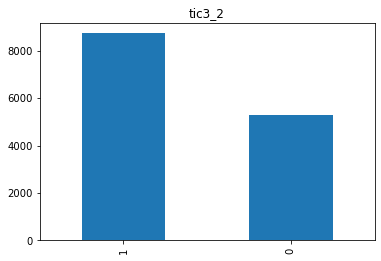

In [32]:
df.tic3_2.value_counts().plot(kind='bar', title="tic3_2")
plt.show()

### 3. No colinelidad perfecta ni semi-perfecta en los predictores

In [33]:
df.dtypes

tic2_2_1a    int64
tic2_2_1b    int64
tic2_2_1c    int64
tic2_3       int64
tic2_6a      int64
tic2_6b      int64
tic2_6c      int64
tic2_6d      int64
tic2_6f      int64
tic2_6g      int64
tic2_6h      int64
tic2_6i      int64
tic2_6k      int64
tic2_8       int64
tic2_8_2b    int64
tic2_8_2c    int64
tic3_1       int64
tic3_1_2b    int64
tic3_1_2c    int64
tic3_1_2d    int64
tic3_1_2e    int64
tic3_1_2f    int64
tic3_2       int64
tic4_2a      int64
tic4_2b      int64
tic4_2c      int64
tic4_2d      int64
tic4_2e      int64
tic4_4a      int64
tic4_4b      int64
tic4_4c      int64
tic4_4d      int64
tic4_4e      int64
tic4_4f      int64
tic4_4g      int64
tic4_4h      int64
tic5_1a      int64
tic5_1b      int64
tic5_1d      int64
tic5_1f      int64
tic5_1h      int64
tic6_1       int64
tic6_2a      int64
tic6_2b      int64
tic6_2c      int64
dtype: object

In [34]:
df2 = df[['tic3_2', 'tic2_2_1a', 'tic2_3', 'tic2_6b', 'tic2_6c', 'tic2_6d', 'tic2_6h', 'tic2_6k', 
          'tic2_8', 'tic2_8_2b', 'tic2_8_2c', 'tic3_1', 'tic4_2c', 'tic4_2e', 'tic4_4b', 'tic4_4c', 
          'tic4_4f', 'tic4_4h', 'tic5_1a', 'tic5_1d', 'tic6_1', 'tic6_2a', 'tic6_2b', 'tic6_2c']]

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
var_predictoras=['tic3_2', 'tic2_2_1a', 'tic2_3', 'tic2_6b', 'tic2_6c', 'tic2_6d', 'tic2_6h', 'tic2_6k', 
          'tic2_8', 'tic2_8_2b', 'tic2_8_2c', 'tic3_1', 'tic4_2c', 'tic4_2e', 'tic4_4b', 'tic4_4c', 
          'tic4_4f', 'tic4_4h', 'tic5_1a', 'tic5_1d', 'tic6_1', 'tic6_2a', 'tic6_2b', 'tic6_2c']

In [37]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df[var_predictoras].columns
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df[var_predictoras].values, i) for i in range(len(df[var_predictoras].columns))]

print(vif_data)

      feature       VIF
0      tic3_2  3.480628
1   tic2_2_1a  6.232604
2      tic2_3  1.764910
3     tic2_6b  1.597600
4     tic2_6c  1.534422
5     tic2_6d  1.230647
6     tic2_6h  1.510303
7     tic2_6k  2.462125
8      tic2_8  1.890750
9   tic2_8_2b  1.681535
10  tic2_8_2c  5.785155
11     tic3_1  4.810972
12    tic4_2c  1.932485
13    tic4_2e  2.602300
14    tic4_4b  2.089157
15    tic4_4c  1.968470
16    tic4_4f  1.992395
17    tic4_4h  2.013709
18    tic5_1a  1.068643
19    tic5_1d  3.666125
20     tic6_1  2.532929
21    tic6_2a  6.712042
22    tic6_2b  5.744700
23    tic6_2c  2.236755


In [38]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns.difference(['tic2_2_1a', 'tic2_8_2c', 'tic6_2a'])
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2[df2.columns.difference(['tic2_2_1a', 'tic2_8_2c', 'tic6_2a'])].values, i) \
                   
                   for i in range(len(df2[df2.columns.difference(['tic2_2_1a', 'tic2_8_2c', 'tic6_2a'])].columns))]

print(vif_data)

      feature       VIF
0      tic2_3  1.746343
1     tic2_6b  1.597464
2     tic2_6c  1.531858
3     tic2_6d  1.230435
4     tic2_6h  1.506049
5     tic2_6k  2.443719
6      tic2_8  1.730782
7   tic2_8_2b  1.553523
8      tic3_1  4.506368
9      tic3_2  3.462722
10    tic4_2c  1.891548
11    tic4_2e  2.581064
12    tic4_4b  2.088437
13    tic4_4c  1.967800
14    tic4_4f  1.989254
15    tic4_4h  2.010862
16    tic5_1a  1.067942
17    tic5_1d  3.434860
18     tic6_1  2.147064
19    tic6_2b  4.208155
20    tic6_2c  1.644344


### Predicciones

In [40]:
# performing predictions on the train datdaset
y_pred = results_2.predict()

<AxesSubplot:xlabel='tic3_1', ylabel='tic3_2'>

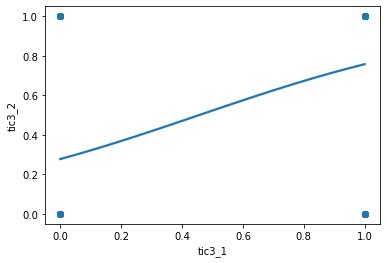

In [41]:
sns.regplot(x=df.tic3_1, y=df.tic3_2, data=df, logistic=True, ci=None)

## Evaluación del Modelo

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [43]:
# round() Aquí estamos transformando las probabilidades a 0 y 1, comparándolas con el threshold de 0.5
rounded_pred = list(map(round, y_pred))

In [44]:
# Accuracy
print('\nNuestro modelo presenta un accuracy de: ', accuracy_score(df.tic3_2, rounded_pred).round(2))


Nuestro modelo presenta un accuracy de:  0.75


In [45]:
confusion_matrix(df.tic3_2, rounded_pred) 

array([[2824, 2471],
       [1029, 7705]], dtype=int64)

## Compración del modelo frente al modelo nulo

In [46]:
regresion_3 = regresion = smf.logit("tic3_2 ~ 1", data=df)
results_3 = regresion_3.fit()

Optimization terminated successfully.
         Current function value: 0.662793
         Iterations 4


In [47]:
print(results_3.summary())

                           Logit Regression Results                           
Dep. Variable:                 tic3_2   No. Observations:                14029
Model:                          Logit   Df Residuals:                    14028
Method:                           MLE   Df Model:                            0
Date:                Sun, 11 Jun 2023   Pseudo R-squ.:               9.358e-11
Time:                        20:34:26   Log-Likelihood:                -9298.3
converged:                       True   LL-Null:                       -9298.3
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5005      0.017     28.734      0.000       0.466       0.535


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Definir las variables X e y según tus datos
X = df['tic3_1'].values.reshape(-1, 1)  # Variable X con tic3_1, convertida a un array bidimensional
y = df.drop('tic3_1', axis=1)  # Variable y con todas las columnas de df excepto tic3_1

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión logística en los datos de entrenamiento
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Realizar las predicciones en los datos de prueba
y_pred = logistic_model.predict(X_test)

# Calcular la exactitud en los datos de prueba
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud:", accuracy)